In [1]:
#!/usr/bin/env python

### TOOLKITS ###
import numpy as np # Numpy Numerical Toolkit
import skbio as sk # SciKit-Bio Toolkit
import scipy as sp  # Scipy Scientific Toolkit
from scipy.cluster.hierarchy import linkage # Scipy Tree Linkage Function

### DATA STRUCTURES ###
import pandas as pd # Pandas Dataframes
from IPython.display import display
import biom # Biom Format Used for Microbiome Analyses
from skbio.tree import TreeNode # SciKit - Bio TreeNode object to Store Phylogeny
import ete3 as ete # Ete3 tree viewing tools
from skbio.stats.distance import DistanceMatrix # SciKit-Bio DistanceMatrix Object
from skbio.stats.distance import DissimilarityMatrix # SciKit-Bio DissimilarityMatrix Object

### PLOTTING ###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### FUNCTIONALITY ###
import os # Tool for terminal and operating system type calls
import glob # Tool to Regex Search for Files
import random       # Generate Random Values
random.seed(54321)  # Set Random Seed for Reproducibility
import itertools # Iterate through data
from IPython.core.interactiveshell import InteractiveShell # Set Notebook to Evaulate Variables on All Lines (not just last line)
InteractiveShell.ast_node_interactivity = "all"
from IPython.utils import io # Used to capture the output of cells and write to file

### PRINT DATE AND TIME ###
import time
print (' - Date: '+time.strftime("%d/%m/%Y")+' '+time.strftime("%H:%M:%S")+' - ')

### Import Toolkits ###
from brooks import *

 - Date: 10/08/2017 15:36:01 - 


<h1 style="text-align:Center; color:orange;">- Brooks Tools -</h1>
<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>
<h4 style="text-align:center; color:blue;">Andrew W. Brooks</h4>
<h4 style="text-align:center; color:blue;">Vanderbilt Genetics Institute</h4>
<h4 style="text-align:center; color:blue;">andrew.w.brooks(at)vanderbilt.edu</h4>
<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>
<h4 style="text-align:center; color:black;">Released under MIT License</h4>
<h4 style="text-align:center; color:black;">Copyright (c) 2017 Andrew W. Brooks</h4>
<h4 style="text-align:center; color:black;">Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software. The software is provided "as is", without warranty of any kind, express or implied, including but not limited to the warranties of merchantability, fitness for a particular purpose and noninfringement. In no event shall the authors or copyright holders be liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, arising from, out of or in connection with the software or the use or other dealings in the software.</h4>
<h4 style="text-align:center; color:red;"></h4>
<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>

<h1 style="text-align:center; color:orange;"> - Primary Input -</h1>

    This toolkit uses a dictionary named varDict to store objects flexibly. 
    To assign objects to varDict simply type varDict['your_name_here'] = ...
    There are some general keys I have been using for certain types of objects:
       varDict['csv'] for CSV files into a Pandas Dataframe
       varDict['tsv'] for TSV files into a Pandas Dataframe
       varDict['bt']  JSON file into BIOM Table
       varDict['mp']  QIIME Format Mapping File into Pandas Dataframe (sets #SampleID to index)
       varDict['rt']  Rarefied BIOM Table
       varDict['rts'] Directory of Rarefied BIOM Tables into a List
       varDict['dm']  Distance Matrix into DistanceMatrix
       varDict['dms'] Distance Matrices Found Using GLOB into List
       varDict['tre'] Newick Dendrogram into TreeNode
       
   Below are some tools to help import these items easily:

<h3 style="text-align:center; color:blue;"> - Read Processed BIOM Project -</h3>

In [2]:
### Input Variables ###
dir_path   = '/Users/brooks/Dropbox/Vanderbilt/American_Gut/Data_Pipeline/' # Source or Output Directory
betaMetric = 'unweighted_unifrac'
rareDepth  = 1000
##################################################################################
biom_path     = dir_path+'1_0_biom.biom' # Path to Biom Table File
map_path      = dir_path+'1_3_alpha_map_'+str(rareDepth)+'.txt' # Path to Dataframe CSV QIIME Format Mapping File
rare_dir      = dir_path+'1_2_rarefaction_'+str(rareDepth)+'/rarefaction*.biom' # Path to Directory of Rarefied Biom Tables
dist_matrix   = dir_path+'1_4_beta/'+betaMetric+'_'+str(rareDepth)+'/consensus.txt' # Path to Individual Distance Matrix
dist_matrices = dir_path+'1_4_beta/'+betaMetric+'_'+str(rareDepth)+'/dm_*.txt' # Path to Directory of Distance Matrices
tre_path      = dir_path+'1_0_tree.tre' # Path to Dendrogram or Phylogeny
##################################################################################
### Load Files from Provided Paths ###    
varDict = pipe_input(dir_path=dir_path,           # varDict['dir']  = directory
                     biom_path=biom_path,         # varDict['bt']   = biom_in(biom_path)
                     map_path=map_path,           # varDict['mp']   = mp = pd_in(map_path); varDict['mp'] = pd_setindex(mp, '#SampleID')
                     rare_dir=rare_dir,           # varDict['rts']  = for curIdx, curTable in enumerate(glob.glob(rare_dir+'/*')): varDict['rt'].append(biom_in(curTable))
                     dist_matrix=dist_matrix,     # varDict['dm']   = DistanceMatrix.read(dist_matrix)
                     dist_matrices=dist_matrices, # varDict['dms']  = for curIdx, curDM in enumerate(glob.glob(dist_matrices+"/*")): varDict['dms'].append(DistanceMatrix.read(curDM))
                     tre_path=tre_path)           # varDict['tre']  = tree_in(tre_path)
# Print Keys #
print(' - Dictionary Keys - ');print(varDict.keys())

 - Setting Output Directory -o: 
   /Users/brooks/Dropbox/Vanderbilt/American_Gut/Data_Pipeline/

 - Loading BIOM Table -b: 
   /Users/brooks/Dropbox/Vanderbilt/American_Gut/Data_Pipeline/1_0_biom.biom
   - Loaded BIOM Table -b
 - BIOM Summary -
   - Samples         : 1375   (i.e.)  ['10317.000002503' '10317.000013618' '10317.000031796']...
   - Observations    : 5591   (i.e.)  ['1081058' '359105' '311173']...
   - Total Counts    : 29041078.0
   - Number Non-Zero : 616106

   - Relative Abundance Table Computed - 

 - Loading Mapping File -m: 
   /Users/brooks/Dropbox/Vanderbilt/American_Gut/Data_Pipeline/1_3_alpha_map_1000.txt
   - Loaded Mapping File -m

 - Loading Directory of Rarefied Tables -r: 
   /Users/brooks/Dropbox/Vanderbilt/American_Gut/Data_Pipeline/1_2_rarefaction_1000/rarefaction*.biom
     - Completed: 0 -
     - Completed: 10 -
     - Completed: 20 -
     - Completed: 30 -
     - Completed: 40 -
     - Completed: 50 -
     - Completed: 60 -
     - Completed: 70 -
    

<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>
<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>
<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>

<h1 style="text-align:center; color:orange;"> - Playplace -</h1>
<h4 style="text-align:center; color:black;"> Where all of your wildest dreams come true!</h4>

<h2 style="text-align:center; color:red;"> - Finalizing - </h2>

<h3 style="text-align:center; color:blue;"> - Template Function -</h3>
<h4 style="text-align:center; color:black;"> Description </h4>

<h4 style="text-align:center; color:brown;"> - Get Dataframe of Taxonomy and Stats - </h4>

In [3]:
### Get Dataframe of Observation Taxonomy and Stats by Group ###
gsDf = biom_group_stats(table=varDict['bt'], mapIn=varDict['mp'], mapCat='race', nnz_group_count=[5,10])

 - Entering Group Statistics for Observations Pipeline - 
   - Getting Relative Abundance as Dataframe - 
   - Adding Mapping Column - 
   - Getting Unique Categories: ['Caucasian' 'Hispanic' 'Asian or Pacific Islander' 'African American']
   - Getting Dataframe of Bacterial Taxonomies - 
 - Generating Dataframe of Taxonomy - 
   - Looping Through 5592 Observations - 
     - Progress: 0
     - Progress: 100
     - Progress: 200
     - Progress: 300
     - Progress: 400
     - Progress: 500
     - Progress: 600
     - Progress: 700
     - Progress: 800
     - Progress: 900
     - Progress: 1000
     - Progress: 1100
     - Progress: 1200
     - Progress: 1300
     - Progress: 1400
     - Progress: 1500
     - Progress: 1600
     - Progress: 1700
     - Progress: 1800
     - Progress: 1900
     - Progress: 2000
     - Progress: 2100
     - Progress: 2200
     - Progress: 2300
     - Progress: 2400
     - Progress: 2500
     - Progress: 2600
     - Progress: 2700
     - Progress: 2800
   

<h4 style="text-align:center; color:brown;"> - Import the Previous Kruskal Wallis Results for OTUs and Merge - </h4>

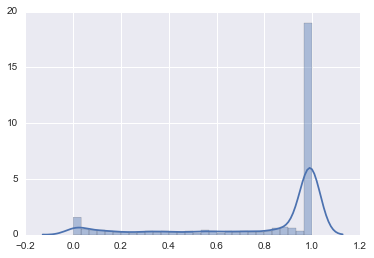

,kingdom,phylum,class,order,family,genus,species,Caucasian_nnz,Caucasian_ubiquity,Caucasian_sum,...,OneCount,OneMean,TwoGroup,TwoCount,TwoMean,pValue,TestStatistic,pFDR,pBonferroni,NumBonferroni
1081058,k__Bacteria,k__Bacteria;p__Firmicutes,k__Bacteria;p__Firmicutes;c__Bacilli,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,64,0.051738,0.009086,...,1375.0,6.831182e-06,NaN,NaN,NaN,0.426507,2.781789,0.991124,NaN,NaN
359105,k__Bacteria,k__Bacteria;p__Verrucomicrobia,k__Bacteria;p__Verrucomicrobia;c__Verrucomicro...,k__Bacteria;p__Verrucomicrobia;c__Verrucomicro...,k__Bacteria;p__Verrucomicrobia;c__Verrucomicro...,k__Bacteria;p__Verrucomicrobia;c__Verrucomicro...,k__Bacteria;p__Verrucomicrobia;c__Verrucomicro...,24,0.019402,0.002115,...,1375.0,1.616446e-06,NaN,NaN,NaN,0.789860,1.047090,0.991124,NaN,NaN
311173,k__Bacteria,k__Bacteria;p__Proteobacteria,k__Bacteria;p__Proteobacteria;c__Epsilonproteo...,k__Bacteria;p__Proteobacteria;c__Epsilonproteo...,k__Bacteria;p__Proteobacteria;c__Epsilonproteo...,k__Bacteria;p__Proteobacteria;c__Epsilonproteo...,k__Bacteria;p__Proteobacteria;c__Epsilonproteo...,6,0.004850,0.078381,...,1375.0,5.700453e-05,NaN,NaN,NaN,0.879816,0.671802,0.991124,NaN,NaN
2700687,k__Bacteria,k__Bacteria;p__Firmicutes,k__Bacteria;p__Firmicutes;c__Clostridia,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,5,0.004042,0.001268,...,1375.0,7.681508e-06,NaN,NaN,NaN,0.046532,7.974977,0.319213,NaN,NaN
3450454,k__Bacteria,k__Bacteria;p__Firmicutes,k__Bacteria;p__Firmicutes;c__Clostridia,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,71,0.057397,0.006062,...,1375.0,5.020930e-06,NaN,NaN,NaN,0.703260,1.409709,0.991124,NaN,NaN
362389,k__Bacteria,k__Bacteria;p__Firmicutes,k__Bacteria;p__Firmicutes;c__Clostridia,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,160,0.129345,0.017479,...,1375.0,1.377194e-05,NaN,NaN,NaN,0.922909,0.481628,0.991124,NaN,NaN
1135042,k__Bacteria,k__Bacteria;p__Bacteroidetes,k__Bacteria;p__Bacteroidetes;c__Bacteroidia,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,39,0.031528,0.042455,...,1375.0,3.377046e-05,NaN,NaN,NaN,0.058280,7.472090,0.364070,NaN,NaN
176062,k__Bacteria,k__Bacteria;p__Firmicutes,k__Bacteria;p__Firmicutes;c__Clostridia,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,327,0.264349,0.639840,...,1375.0,5.128266e-04,NaN,NaN,NaN,0.002676,14.175518,0.044260,NaN,NaN
1001908,k__Bacteria,k__Bacteria;p__Proteobacteria,k__Bacteria;p__Proteobacteria;c__Betaproteobac...,k__Bacteria;p__Proteobacteria;c__Betaproteobac...,k__Bacteria;p__Proteobacteria;c__Betaproteobac...,k__Bacteria;p__Proteobacteria;c__Betaproteobac...,k__Bacteria;p__Proteobacteria;c__Betaproteobac...,6,0.004850,0.000111,...,1375.0,8.062088e-08,NaN,NaN,NaN,0.879816,0.671802,0.991124,NaN,NaN
575041,k__Bacteria,k__Bacteria;p__Bacteroidetes,k__Bacteria;p__Bacteroidetes;c__Bacteroidia,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,104,0.084074,0.024201,...,1375.0,1.804662e-05,NaN,NaN,NaN,0.363977,3

In [5]:
### Input Kruskal Wallis Associations ###
taxaAssociations = pd_in('/Users/brooks/Dropbox/Vanderbilt/American_Gut/Data_Pipeline/2_4_taxa_association_otus_kw.txt')
### Set Index as OTU ###
taxaAssociations = taxaAssociations.set_index(['taxon'])
### Get just Stats Columns ###
taxaAssociations = taxaAssociations[['Test', 'OneGroup',
       'OneCount', 'OneMean', 'TwoGroup', 'TwoCount', 'TwoMean', 'pValue',
       'TestStatistic', 'pFDR', 'pBonferroni', 'NumBonferroni']]
# Recast Index as String #
taxaAssociations.index = taxaAssociations.index.map(str)
# Merge the Kruskal Wallis Results with the Group Statistics #
gsDf2 = gsDf.merge(taxaAssociations, left_index=True, right_index=True)
# Calculate FDR Corrected P-Values #
gsDf2['pFDR'] = stats_fdr(gsDf2['pValue'])
# Examine P-Value Distribution #
fig, ax = plt.subplots()
sns.distplot(sorted(gsDf2['pFDR']), ax=ax)
#sns.distplot(sorted(np.log10(gsDf2['pFDR'])), ax=ax, color='g')
plt.show()
gsDf2

<h4 style="text-align:center; color:brown;"> - Get Number of OTUs filtered by ubiquity and abundance by group - </h4>

Caucasian
   - Num OTUs: 183
   - Mean Ubiquity 0.686792919588
   - Mean Abundance 0.00365571315418
   - Mean A/U 0.00532287542564
Hispanic
   - Num OTUs: 250
   - Mean Ubiquity 0.693513513514
   - Mean Abundance 0.00290291097743
   - Mean A/U 0.00418580304618
   - Overlap Caucasian 172 261 0.6590038314176245
     - Ubiquity p-value: 0.789929829972 0.693513513514 0.686792919588
     - Abundance p-value: 0.000201453609962 0.00290291097743 0.00365571315418
     - Abundance/Ubiquity p-value: 1.71532873485e-22 0.00418580304618 0.00532287542564


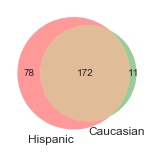

Asian or Pacific Islander
   - Num OTUs: 171
   - Mean Ubiquity 0.683479532164
   - Mean Abundance 0.0036985306299
   - Mean A/U 0.00541132609807
   - Overlap Caucasian 150 204 0.7352941176470589
     - Ubiquity p-value: 0.836943124701 0.683479532164 0.686792919588
     - Abundance p-value: 0.280203487362 0.0036985306299 0.00365571315418
     - Abundance/Ubiquity p-value: 8.15199664337e-09 0.00541132609807 0.00532287542564


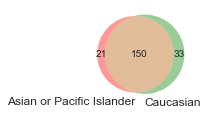

   - Overlap Hispanic 154 267 0.5767790262172284
     - Ubiquity p-value: 0.577264867713 0.683479532164 0.693513513514
     - Abundance p-value: 0.0136979127665 0.0036985306299 0.00290291097743
     - Abundance/Ubiquity p-value: 1.25307093961e-13 0.00541132609807 0.00418580304618


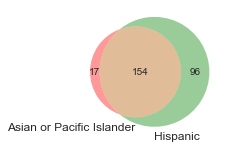

African American
   - Num OTUs: 149
   - Mean Ubiquity 0.685596282912
   - Mean Abundance 0.00435348938979
   - Mean A/U 0.00634993143676
   - Overlap Caucasian 111 221 0.502262443438914
     - Ubiquity p-value: 0.888259914474 0.685596282912 0.686792919588
     - Abundance p-value: 0.167377568254 0.00435348938979 0.00365571315418
     - Abundance/Ubiquity p-value: 1.29663003965e-23 0.00634993143676 0.00532287542564


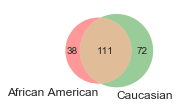

   - Overlap Hispanic 124 275 0.4509090909090909
     - Ubiquity p-value: 0.58993844653 0.685596282912 0.693513513514
     - Abundance p-value: 0.0816046416886 0.00435348938979 0.00290291097743
     - Abundance/Ubiquity p-value: 4.58611779619e-24 0.00634993143676 0.00418580304618


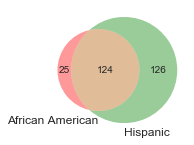

   - Overlap Asian or Pacific Islander 108 212 0.5094339622641509
     - Ubiquity p-value: 0.984504435634 0.685596282912 0.683479532164
     - Abundance p-value: 0.700994859933 0.00435348938979 0.0036985306299
     - Abundance/Ubiquity p-value: 4.16903970142e-22 0.00634993143676 0.00541132609807


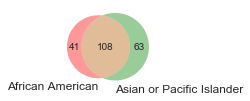

In [6]:
from matplotlib_venn import venn2, venn2_circles
minUbiq = 0.5
minAbund = 0.000000001
groupsIn = ['Caucasian', 'Hispanic', 'Asian or Pacific Islander','African American']

overlapSummary = []
allOTUs = []
for idx, i in enumerate(groupsIn):
    print(i)
    subDf = gsDf2[(gsDf2[i+'_ubiquity'] > minUbiq) & (gsDf2[i+'_mean'] > minAbund)]
    
    
    print('   - Num OTUs: '+str(len(subDf)))
    print('   - Mean Ubiquity '+str(np.mean(subDf[i+'_ubiquity'])))
    print('   - Mean Abundance '+str(np.mean(subDf[i+'_mean'])))
    print('   - Mean A/U '+str(np.mean(subDf[i+'_mean']/np.mean(subDf[i+'_ubiquity']))))

    allOTUs.append(list(subDf.index))
    
    # If not first group #
    if idx > 0:
        for idx2 in np.arange(idx):
            subDf2 = gsDf2[(gsDf2[groupsIn[idx2]+'_ubiquity'] > minUbiq) & (gsDf2[groupsIn[idx2]+'_mean'] > minAbund)]
            totOTUs = (len(list(set(allOTUs[idx]) | set(allOTUs[idx2]))))
            print('   - Overlap '+groupsIn[idx2]+' '+str(len(list(set(allOTUs[idx]) & set(allOTUs[idx2]))))+' '+str(len(list(set(allOTUs[idx]) | set(allOTUs[idx2])))) + ' '+str((len(list(set(allOTUs[idx]) & set(allOTUs[idx2]))))/(len(list(set(allOTUs[idx]) | set(allOTUs[idx2]))))))
            #str(len(list(set(allOTUs[idx]) & set(idx2))))
            print('     - Ubiquity p-value: '+str(sp.stats.mannwhitneyu(subDf[i+'_ubiquity'], subDf2[groupsIn[idx2]+'_ubiquity'], use_continuity=True, alternative='two-sided')[1])+' '+str(np.mean(subDf[i+'_ubiquity']))+' '+str(np.mean(subDf2[groupsIn[idx2]+'_ubiquity'])))
            print('     - Abundance p-value: '+str(sp.stats.mannwhitneyu(subDf[i+'_mean'], subDf2[groupsIn[idx2]+'_mean'], use_continuity=True, alternative='two-sided')[1])+' '+str(np.mean(subDf[i+'_mean']))+' '+str(np.mean(subDf2[groupsIn[idx2]+'_mean'])))
            print('     - Abundance/Ubiquity p-value: '+str(sp.stats.mannwhitneyu(subDf[i+'_mean']/subDf[i+'_ubiquity'],
                                                            subDf2[groupsIn[idx2]+'_mean']/subDf[groupsIn[idx2]+'_ubiquity'], 
                                                            use_continuity=True, alternative='two-sided')[1])+' '+str(np.mean(subDf[i+'_mean'])/np.mean(subDf[i+'_ubiquity']))+' '+str(np.mean(subDf2[groupsIn[idx2]+'_mean'])/np.mean(subDf2[groupsIn[idx2]+'_ubiquity'])))
            overlapSummary.append((groupsIn[idx], groupsIn[idx2], len(allOTUs[idx])-(len(list(set(allOTUs[idx]) & set(allOTUs[idx2])))), len(allOTUs[idx2])-(len(list(set(allOTUs[idx]) & set(allOTUs[idx2])))), len(list(set(allOTUs[idx]) & set(allOTUs[idx2])))))
            fig, axs = plt.subplots(1,1,figsize=(max(len(allOTUs[idx]), len(allOTUs[idx2]))*0.01, max(len(allOTUs[idx]), len(allOTUs[idx2]))*0.01))
            fig = venn2(subsets=[len(allOTUs[idx])-(len(list(set(allOTUs[idx]) & set(allOTUs[idx2])))), len(allOTUs[idx2])-(len(list(set(allOTUs[idx]) & set(allOTUs[idx2])))), len(list(set(allOTUs[idx]) & set(allOTUs[idx2])))], set_labels=(groupsIn[idx], groupsIn[idx2]))
            plt.savefig(varDict['dir']+'overlap_'+groupsIn[idx]+'_'+groupsIn[idx2]+'_ubiq_'+str(minUbiq)+'_abund_'+str(minAbund)+'.pdf')
            plt.show()
            plt.clf()

In [13]:
len(list(set().union(*allOTUs)))

293

In [14]:
len(gsDf2)

5591

In [41]:
### Get Counts for All and Overlapping OTUs ###
overlapSum = [curSum[4] for curSum in overlapSummary]
overlapSum
allSum = [(curSum[2] + curSum[3] + curSum[4]) for curSum in overlapSummary]
allSum

[172, 150, 154, 111, 124, 108]

[261, 204, 267, 221, 275, 212]

,g1,g2,g1_unique,g2_unique,overlapping,total,proportion
0,Hispanic,Caucasian,78,11,172,261,0.659004
1,Asian or Pacific Islander,Caucasian,21,33,150,204,0.735294
2,Asian or Pacific Islander,Hispanic,17,96,154,267,0.576779
3,African American,Caucasian,38,72,111,221,0.502262
4,African American,Hispanic,25,126,124,275,0.450909
5,African American,Asian or Pacific Islander,41,63,108,212,0.509434


261 0.659003831418
204 0.735294117647
267 0.576779026217
221 0.502262443439
275 0.450909090909
212 0.509433962264


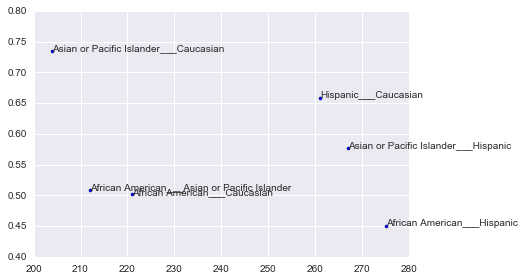

In [76]:
### Get Overlap Summaries as Dataframe ###
overlapSumPD = pd.DataFrame.from_records(overlapSummary)
overlapSumPD.columns = ['g1','g2','g1_unique','g2_unique','overlapping']
overlapSumPD['total'] = overlapSumPD['g1_unique']+overlapSumPD['g2_unique']+overlapSumPD['overlapping']
overlapSumPD['proportion'] = overlapSumPD['overlapping']/overlapSumPD['total']
overlapSumPD
### Plot Some Relationships ###
#fig, axs = plt.subplots(1,1,figsize=(10,10))
#sns.jointplot(x='g1_unique',y='proportion',data=overlapSumPD)
#sns.jointplot(x='g2_unique',y='proportion',data=overlapSumPD)
#sns.jointplot(x='overlapping',y='proportion',data=overlapSumPD)
plt.scatter(x=overlapSumPD['total'],y=overlapSumPD['proportion'],s=10)
for i in overlapSumPD.index:
    print(overlapSumPD.loc[i,'total'], overlapSumPD.loc[i,'proportion'])
    _ = plt.text(s=(list(overlapSumPD.loc[i,['g1']])[0]+'___'+list(overlapSumPD.loc[i,['g2']])[0]), 
             x=overlapSumPD.loc[i,'total'], 
             y=overlapSumPD.loc[i,'proportion'])
plt.tight_layout(); plt.show()

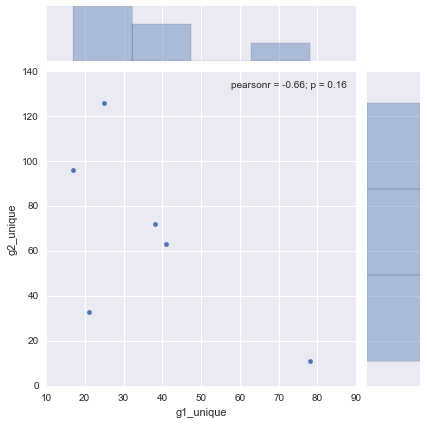

In [71]:
sns.jointplot(overlapSumPD['g1_unique'],overlapSumPD['g2_unique'])

Caucasian
Caucasian
Caucasian
   - Mean AU: 0.0045718806659
Caucasian_mean_log ~ Caucasian_ubiquity
                            OLS Regression Results                            
Dep. Variable:     Caucasian_mean_log   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     164.8
Date:                Wed, 09 Aug 2017   Prob (F-statistic):           3.08e-27
Time:                        16:52:10   Log-Likelihood:                -103.50
No. Observations:                 183   AIC:                             211.0
Df Residuals:                     181   BIC:                             217.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

/Users/brooks/miniconda2/envs/qiime2/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log10
/Users/brooks/miniconda2/envs/qiime2/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log10
/Users/brooks/miniconda2/envs/qiime2/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log10


Caucasian_AU ~ Caucasianlog10(pFDR)


Hispanic
Hispanic
Hispanic
   - Mean AU: 0.00357040824469
Hispanic_mean_log ~ Hispanic_ubiquity
                            OLS Regression Results                            
Dep. Variable:      Hispanic_mean_log   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     179.7
Date:                Wed, 09 Aug 2017   Prob (F-statistic):           3.48e-31
Time:                        16:52:10   Log-Likelihood:                -186.15
No. Observations:                 250   AIC:                             376.3
Df Residuals:                     248   BIC:                             383.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

Hispanic_AU ~ Hispaniclog10(pFDR)


Asian or Pacific Islander
Asian or Pacific Islander
Asian or Pacific Islander
   - Mean AU: 0.00466948884093
Asian_or_Pacific_Islander_mean_log ~ Asian or Pacific Islander_ubiquity
                                    OLS Regression Results                                    
Dep. Variable:     Asian_or_Pacific_Islander_mean_log   R-squared:                       0.437
Model:                                            OLS   Adj. R-squared:                  0.434
Method:                                 Least Squares   F-statistic:                     131.2
Date:                                Wed, 09 Aug 2017   Prob (F-statistic):           7.50e-23
Time:                                        16:52:10   Log-Likelihood:                -116.84
No. Observations:                                 171   AIC:                             237.7
Df Residuals:                                     169   BIC:                             244.0
Df Model:                                           1      

Asian_or_Pacific_Islander_AU ~ Asian or Pacific Islanderlog10(pFDR)


African American
African American
African American
   - Mean AU: 0.00545459431361
African_American_mean_log ~ African American_ubiquity
                                OLS Regression Results                               
Dep. Variable:     African_American_mean_log   R-squared:                       0.334
Model:                                   OLS   Adj. R-squared:                  0.329
Method:                        Least Squares   F-statistic:                     73.60
Date:                       Wed, 09 Aug 2017   Prob (F-statistic):           1.24e-14
Time:                               16:52:10   Log-Likelihood:                -130.32
No. Observations:                        149   AIC:                             264.6
Df Residuals:                            147   BIC:                             270.7
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
    

African_American_AU ~ African Americanlog10(pFDR)


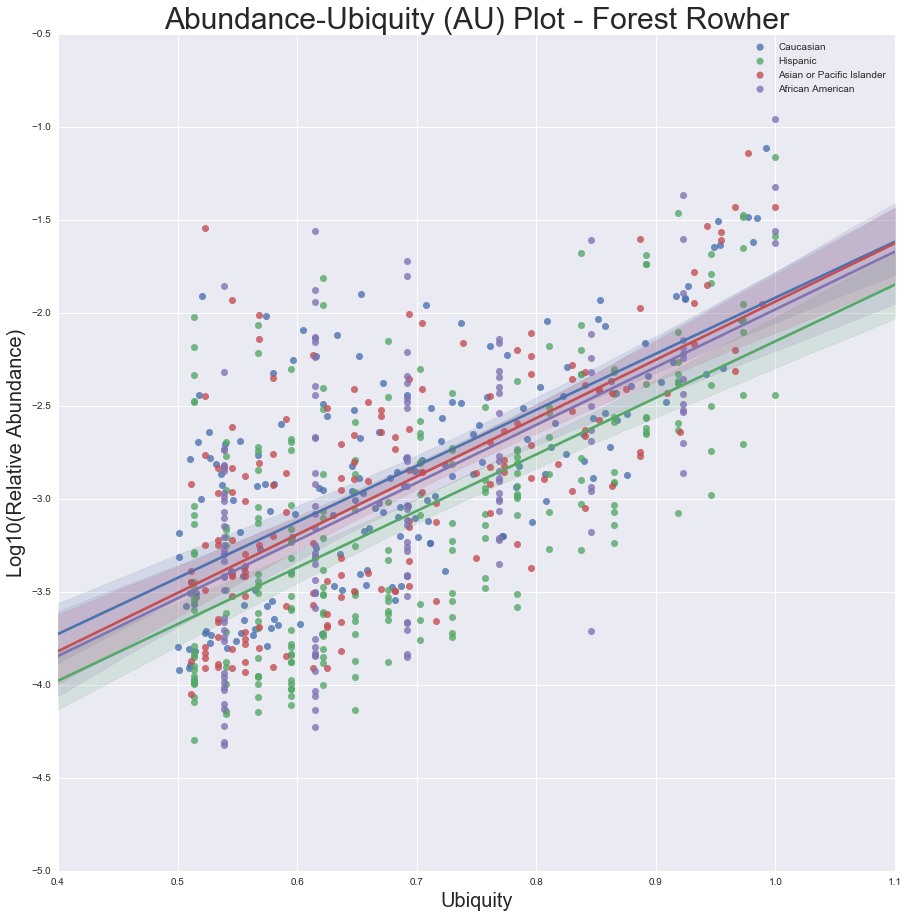

In [89]:
minUbiq = 0.5
minAbund = 0.000000001

# Plot Ubiquity by Relative Abundance Log10 #
fig, axs = plt.subplots(1,1,figsize=(15,15))
for i in ['Caucasian', 'Hispanic', 'Asian or Pacific Islander','African American']:
    print(i)
    print(i)
    print(i)
    iStrip = i.replace(' ', '_')
    
    # Get Log Transformed Variables #
    gsDf2[iStrip+'_mean'] = gsDf2[i+'_mean']
    gsDf2[iStrip+'_ubiquity'] = gsDf2[i+'_ubiquity']
    gsDf2[iStrip+'_mean_log'] = np.log10(gsDf2[iStrip+'_mean'])
    gsDf2[iStrip+'_ubiquity_log'] = np.log10(gsDf2[iStrip+'_ubiquity'])
    gsDf2[iStrip+'_ubiquity_log'] = np.log10(gsDf2[iStrip+'_ubiquity'])
    gsDf2[iStrip+'_AU'] = gsDf2[iStrip+'_mean']/gsDf2[iStrip+'_ubiquity']
    gsDf2['pFDR_log'] = np.log10(gsDf2['pFDR'])
    
    print('   - Mean AU: '+str(np.mean(gsDf2[(gsDf2[iStrip+'_ubiquity'] > minUbiq) & (gsDf2[iStrip+'_mean'] > minAbund)][iStrip+'_AU'])))
    print(iStrip+'_mean_log ~ '+i+'_ubiquity')
    
    xOut = stats_regression(dfIn=gsDf2[(gsDf2[iStrip+'_ubiquity'] > minUbiq) & (gsDf2[iStrip+'_mean'] > minAbund)], regEquation=iStrip+'_mean_log ~ '+iStrip+'_ubiquity')
    intercept, slope = xOut[0].params
    
    # Plot Abundance Ubiquity Plot #
    sns.regplot(x=iStrip+'_ubiquity', 
                y=iStrip+'_mean_log', data=gsDf2[(gsDf2[iStrip+'_ubiquity'] > minUbiq) & (gsDf2[iStrip+'_mean'] > minAbund)], 
                label=i, ci=95, scatter_kws={'s':50})#, lowess=True)
    
    
    
    print(iStrip+'_AU ~ '+i+'log10(pFDR)')
    #xOut2 = stats_regression(dfIn=gsDf2[(gsDf2[iStrip+'_ubiquity'] > minUbiq) & (gsDf2[iStrip+'_mean'] > minAbund)], 
    #                 regEquation=' pFDR_log ~ '+iStrip+'_AU')
    
    ### Plot OLS Regression Line ###
    # Create a list of values in the best fit line
    abline_values = []
    for k in xOut[2][iStrip+'_ubiquity']:
        abline_values.append((slope * k) + intercept)
    #plt.plot(xOut[2][iStrip+'_ubiquity'], abline_values, '--')
    axs.legend(loc="best")
plt.xlabel('Ubiquity', size=20)
plt.ylabel('Log10(Relative Abundance)', size=20)
plt.title('Abundance-Ubiquity (AU) Plot - Forest Rowher', size=30)
plt.savefig(varDict['dir']+'abundance_ubiquity.pdf')

In [81]:
for i in ['Caucasian', 'Hispanic', 'Asian or Pacific Islander','African American']:
    print(i)
    iStrip = i.replace(' ', '_')
    np.mean(np.log10(gsDf2[iStrip+'_AU']))
    print()

Caucasian


-3.5047820984551312


Hispanic


-3.8126824799501815


Asian or Pacific Islander


-3.6845671084031992


African American


-3.6709002118992871

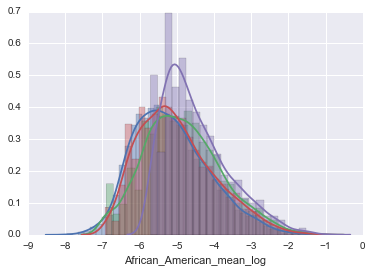

In [91]:
for idx, i in enumerate(groupsIn):
    iStrip = i.replace(' ', '_')
    sns.distplot(a=gsDf2[(gsDf2[iStrip+'_mean_log'] <0) & (gsDf2[iStrip+'_mean_log'] >-10)][iStrip+'_mean_log'])
    #gsDf2[i+'_mean']/gsDf2[i+'_ubiquity'][gsDf2[i+'_mean']/gsDf2[i+'_ubiquity'] > 0]

In [ ]:
gsDf2.to_csv(varDict['dir']+'ubiquitous_families_mean')

<h4 style="text-align:center; color:brown;"> - Import the Previous Kruskal Wallis Results for OTUs and Merge - </h4>

<h4 style="text-align:center; color:brown;"> - Import the Significant Overlapping Taxa - </h4>

In [108]:
taxaKeep = [
('k__Archaea;p__Euryarchaeota',2),
('k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae',5),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__',5),   
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium',6),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae',5),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Ruminococcus',6),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__',6),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__;g__',6),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Veillonellaceae;g__Veillonella',6),
('k__Bacteria;p__Tenericutes',2)]
taxaKeepList = [x[0] for x in taxaKeep]
overlapOTUs = []

for curTax in taxaKeep:
    print(curTax)
    df = biom_filtertaxa_keep(table=varDict['bt'], taxaKeep=[curTax[0]], taxLevel=curTax[1])
    overlapOTUs.extend(df.ids(axis='observation'))

('k__Archaea;p__Euryarchaeota', 2)
('k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae', 5)
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__', 5)
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium', 6)
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae', 5)
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Ruminococcus', 6)
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__', 6)
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__;g__', 6)
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Veillonellaceae;g__Veillonella', 6)
('k__Bacteria;p__Tenericutes', 2)


<h4 style="text-align:center; color:brown;"> - Get Ubiquitus OTUs in All Ethnicities - </h4>

In [110]:
unionOTUs = allOTUs[0]
for curL in allOTUs[1:6]:
    unionOTUs = list(set(curL) & set(unionOTUs))
len(unionOTUs)

#gsDf2.loc[unionOTUs, :].groupby('genus').sum()
unionOTUs = gsDf2.loc[unionOTUs, :]

101

<h4 style="text-align:center; color:brown;"> - Get The Number of OTUs that are among the Ten Overlapping Taxa - </h4>

In [131]:
overlapSumPD['proportion_overlapping_otus'] = 0.0
for curIdx, curE in enumerate(allOTUs):
    groupsIn[curIdx]
    print('   - Ubiquitous OTUs '+str(len(curE)))
    print('   - Overlap with Ten Overlapping Taxa '+str(len(list((set(list(overlapOTUs))&set(curE))))))
    print('   - Ratio: '+str(len(list((set(list(overlapOTUs))&set(curE))))/len(curE) ))


'Caucasian'

   - Ubiquitous OTUs 183
   - Overlap with Ten Overlapping Taxa 66
   - Ratio: 0.36065573770491804


'Hispanic'

   - Ubiquitous OTUs 250
   - Overlap with Ten Overlapping Taxa 96
   - Ratio: 0.384


'Asian or Pacific Islander'

   - Ubiquitous OTUs 171
   - Overlap with Ten Overlapping Taxa 53
   - Ratio: 0.30994152046783624


'African American'

   - Ubiquitous OTUs 149
   - Overlap with Ten Overlapping Taxa 37
   - Ratio: 0.2483221476510067


<h4 style="text-align:center; color:brown;"> - Get OTUs for Each Ethnicity that have the lowest AU Ratio - </h4>

In [132]:
for idx,i in enumerate(['Caucasian', 'Hispanic', 'Asian or Pacific Islander','African American']):
    iStrip = i.replace(' ', '_')
    # Get dataframe of ethnicities ubiquitous OTUs #
    depo = gsDf2[(gsDf2[iStrip+'_AU'] != -np.inf)&(gsDf2[iStrip+'_AU'] != -np.nan)].loc[allOTUs[idx]]\
        .sort(iStrip+'_AU', ascending=True)\
    # and of the full list of OTUs 
    depo2 = gsDf2[(gsDf2[iStrip+'_AU'] != -np.inf)&(gsDf2[iStrip+'_AU'] != -np.nan)]\
        .sort(iStrip+'_AU', ascending=True)\

Caucasian
Caucasian
Caucasian
Hispanic
Hispanic
Hispanic
Asian or Pacific Islander
Asian or Pacific Islander
Asian or Pacific Islander
African American
African American
African American


/Users/brooks/miniconda2/envs/qiime2/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/brooks/miniconda2/envs/qiime2/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


<IPython.core.display.Javascript object>


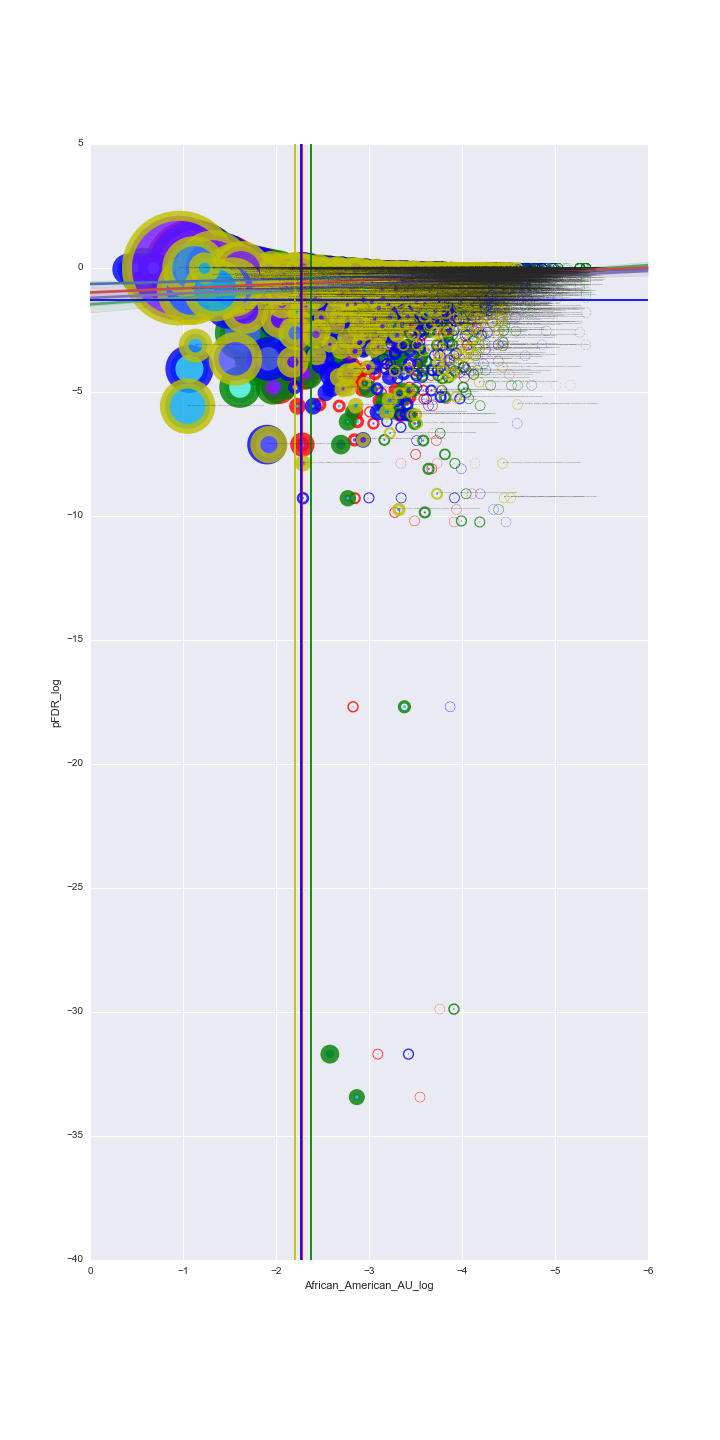

Caucasian
Caucasian
Caucasian


/Users/brooks/miniconda2/envs/qiime2/lib/python3.5/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/brooks/miniconda2/envs/qiime2/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Hispanic
Hispanic
Hispanic


Asian or Pacific Islander
Asian or Pacific Islander
Asian or Pacific Islander


African American
African American
African American


(0.0, 6.0)

(0.0, -6.0)

In [197]:
minUbiq = 0.00000001
minAbund = 0.000000001
maxpFDR = 1.0

### Get Unique Color for Each Family ###
from matplotlib import cm
cmapRainbowFam = cm.rainbow(np.arange(len(gsDf2['family'].unique())))
famColor = {}
for curIdx, curFam in enumerate(gsDf2['family'].unique()):
    famColor[curFam] =  cmapRainbowFam[curIdx]

    
colorsE=['r','g','b','y']
fig, axs = plt.subplots(1,1,figsize=(10,20))
### For each Ethnicity ###
for idx,i in enumerate(['Caucasian', 'Hispanic', 'Asian or Pacific Islander','African American']):
    print(i)
    print(i)
    print(i)
    iStrip = i.replace(' ', '_')
    # Get Log10 Relative Abudnance for OTUs with pFDR (KW) < 0.05 & Abundance > 0.0
    relAbundTemp = gsDf2[ (gsDf2['pFDR']<maxpFDR) & (gsDf2[iStrip+'_mean'] > minAbund) & (gsDf2[iStrip+'_ubiquity'] > minUbiq) ]
    
    
    ### ADDITIONAL CUSTOM FILTERING ###
    
    
    
    # Get _mean as -log10 transformed list #
    relAbundList = list(-np.log10(relAbundTemp[iStrip+'_mean']))
    
    # Rescale AU to 0-1 #
    relAbundTemp.loc[:,iStrip+'_AU_log'] = [np.log10(x) for x in list(relAbundTemp[iStrip+'_AU'])]
    
#print(relAbundTemp.loc[:,iStrip+'_AU_scale01'])
# Plot AU by pFDR ###

    sns.regplot(x=iStrip+'_AU_log', y='pFDR_log', data=relAbundTemp, marker='o',
                scatter_kws={'s':list((relAbundTemp[iStrip+'_mean'])*100000),
                             'color':[list(famColor[x]) for x in list(relAbundTemp['family'])],
                             'edgecolor':colorsE[idx], 'lw':10.0}, 
                ax=axs)
plt.axhline(np.log10(0.05),xmin=0.0,xmax=10)
plt.axvline(np.log10(0.0042), c='g')
plt.axvline(np.log10(0.0053), c='r')
plt.axvline(np.log10(0.0063), c='y')
plt.axvline(np.log10(0.0054), c='b')
axs.set_xlim([0.0,6.0])
axs.set_xlim([0.0,-6.0])


### Label by Family ###
font = {'family': 'serif',
        'weight': 'normal',
        'size': 0.1,
        }
for i in relAbundTemp.index:
    if float(relAbundTemp.loc[i,['pFDR_log']]) < maxpFDR:
        xG = plt.text(s=relAbundTemp.loc[i,'family']+'_'+str(i)+'_RelAbund:_'+str(float(relAbundTemp.loc[i,[iStrip+'_mean']]))+'_AU_'+str(float(relAbundTemp.loc[i,[iStrip+'_AU']])),
                      fontdict=font,
                      x=float(relAbundTemp.loc[i,[iStrip+'_AU_log']]),
                      y=float(relAbundTemp.loc[i,['pFDR_log']]))    

### Save Figure ###
plt.savefig(varDict['dir']+'au_pFDRkw_all.pdf')


<IPython.core.display.Javascript object>


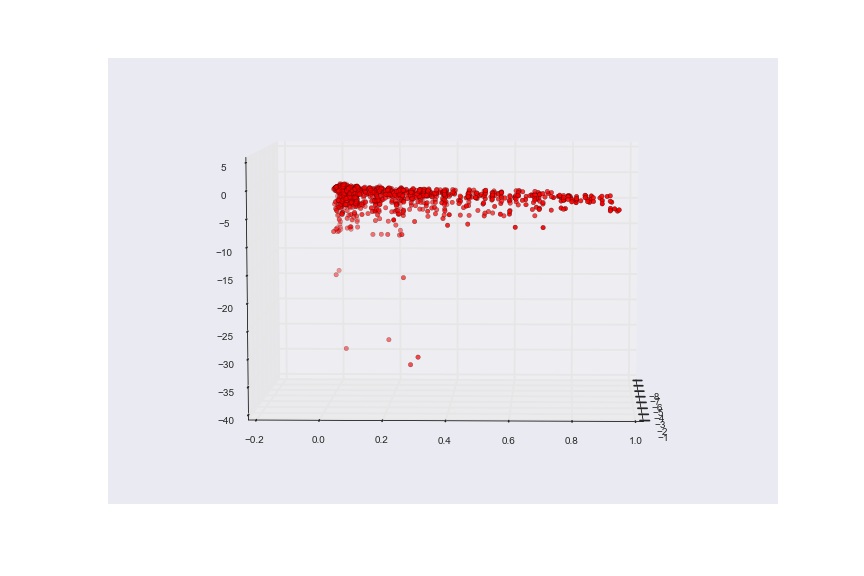

Caucasian


/Users/brooks/miniconda2/envs/qiime2/lib/python3.5/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/brooks/miniconda2/envs/qiime2/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Hispanic


Asian or Pacific Islander


African American


"\n    sns.regplot(x=iStrip+'_AU_log', y='pFDR_log', data=relAbundTemp, marker='o',\n                scatter_kws={'s':list((relAbundTemp[iStrip+'_mean'])*100000),\n                             'color':[list(famColor[x]) for x in list(relAbundTemp['family'])],\n                             'edgecolor':colorsE[idx], 'lw':10.0}, \n                ax=axs)\n\n\n\nx =[1,2,3,4,5,6,7,8,9,10]\ny =[5,6,2,3,13,4,1,2,4,8]\nz =[2,3,3,3,5,7,9,11,9,10]\n\n\n\nax.scatter(x, y, z, c='r', marker='o')\n\nax.set_xlabel('X Label')\nax.set_ylabel('Y Label')\nax.set_zlabel('Z Label')\n\nplt.show()\n"

In [194]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

minUbiq = 0.01
minAbund = 0.000000001
maxpFDR = 0.05

### For each Ethnicity ###
for idx,i in enumerate(['Caucasian', 'Hispanic', 'Asian or Pacific Islander','African American']):
    print(i)
    iStrip = i.replace(' ', '_')
    
    # Get Log10 Relative Abudnance for OTUs with pFDR (KW) < 0.05 & Abundance > 0.0
    relAbundTemp = gsDf2[ (gsDf2['pFDR']<maxpFDR) & (gsDf2[iStrip+'_mean'] > minAbund) & (gsDf2[iStrip+'_ubiquity'] > minUbiq) ]

    # Get _mean as -log10 transformed list #
    relAbundList = list(-np.log10(relAbundTemp[iStrip+'_mean']))
    
    # Rescale AU to 0-1 #
    relAbundTemp.loc[:,iStrip+'_AU_log'] = [np.log10(x) for x in list(relAbundTemp[iStrip+'_AU'])]
    
    
    
    ax.scatter(relAbundTemp.loc[:,iStrip+'_mean_log'],
               relAbundTemp.loc[:,iStrip+'_ubiquity'],
               relAbundTemp.loc[:,'pFDR_log'], c='r', marker='o')
    
    
#print(relAbundTemp.loc[:,iStrip+'_AU_scale01'])
# Plot AU by pFDR ###
"""
    sns.regplot(x=iStrip+'_AU_log', y='pFDR_log', data=relAbundTemp, marker='o',
                scatter_kws={'s':list((relAbundTemp[iStrip+'_mean'])*100000),
                             'color':[list(famColor[x]) for x in list(relAbundTemp['family'])],
                             'edgecolor':colorsE[idx], 'lw':10.0}, 
                ax=axs)



x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
"""

In [ ]:
minUbiq = 0.1
minAbund = 0.000000001
maxpFDR = 01.0


### Get Unique Color for Each Family ###
from matplotlib import cm
cmapRainbowFam = cm.rainbow(np.arange(len(gsDf2.index)))
famColor = {}
for curIdx, curFam in enumerate(gsDf2.index):
    famColor[curFam] =  cmapRainbowFam[curIdx]

### For each Ethnicity ###
for idx,i in enumerate(['Caucasian', 'Hispanic', 'Asian or Pacific Islander','African American']):
    print(i)
    print(i)
    print(i)
    iStrip = i.replace(' ', '_')
    # Get Log10 Relative Abudnance for OTUs with pFDR (KW) < 0.05 & Abundance > 0.0
    
    relAbundTemp = gsDf2[ (gsDf2['pFDR']<maxpFDR) & (gsDf2[iStrip+'_mean'] > minAbund) & (gsDf2[iStrip+'_ubiquity'] > minUbiq) ]
    # Filter to OTUs in 10 Overlapping Taxa #
    relAbundTemp = relAbundTemp.ix[overlapOTUs]
    relAbundTemp = relAbundTemp[relAbundTemp['pFDR'] >=0]
    # Get _mean as -log10 transformed list #
    relAbundList = list(-np.log10(relAbundTemp[iStrip+'_mean']))
    relAbundTemp = relAbundTemp.drop_duplicates()
    relAbundTemp.loc[:,iStrip+'_AU_log'] = [-np.log10(x) for x in list(relAbundTemp[iStrip+'_AU'])]
    
    if ui_tf(): break
    
#print(relAbundTemp.loc[:,iStrip+'_AU_scale01'])
# Plot AU by pFDR ###
fig, axs = plt.subplots(1,1,figsize=(15,15))
sns.regplot(x=iStrip+'_AU_log', y='pFDR_log', data=relAbundTemp, marker='o',
            scatter_kws={'s':list((relAbundTemp[iStrip+'_mean'])*100000),'color':[list(famColor[x]) for x in list(gsDf2.index)]}, ax=axs)
plt.axhline(np.log10(0.05),xmin=0.0,xmax=10)
plt.axvline(-np.log10(0.0042), c='g')
plt.axvline(-np.log10(0.0053), c='r')
plt.axvline(-np.log10(0.0063), c='y')
plt.axvline(-np.log10(0.0054), c='b')
axs.set_xlim([0.0,6.0])
axs.set_xlim([-1.0,10.0])
### Label by Family ###
for i in relAbundTemp.index:
    
    if float(relAbundTemp.loc[i,['pFDR']].ix[0]) < maxpFDR:
        xG = plt.text(s=relAbundTemp.loc[i,['family']].ix[0]+'_'+str(i)+'_RelAbund:_'+str(float(relAbundTemp.loc[i,[iStrip+'_mean']].ix[0]))+'_AU_'+str(float(relAbundTemp.loc[i,[iStrip+'_AU']].ix[0])), 
             x=float(relAbundTemp.loc[i,[iStrip+'_AU_log']].ix[0]),
             y=float(relAbundTemp.loc[i,['pFDR_log']].ix[0]))
            
plt.savefig(varDict['dir']+'au_pFDRkw_'+iStrip+'.pdf')

In [ ]:
### Label by Family ###
for i in relAbundTemp.index:
    print(relAbundTemp.loc[i,['family']].ix[0])
    if relAbundTemp.loc[i,['family']].ix[0] == 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Bifidobacteriaceae':
        
        print('yay')

In [ ]:
float(relAbundTemp.loc[i,['pFDR_log']].ix[0])

In [ ]:
relAbundTemp.loc[i,['pFDR_log']]

In [ ]:
unionOtu = []
for curOtus in allOTUs: unionOtu.extend(curOtus)
unionOtu = set(unionOtu)

In [ ]:
len(list(unionOtu))

In [ ]:
minUbiq = 0.1
minAbund = 0.000000001
maxpFDR = 1.0
#taxaIn = 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Christensenellaceae'
taxaIn = 'k__Bacteria;p__Firmicutes;c__Clostridia'
taxaKeep = [
('k__Archaea;p__Euryarchaeota','phylum'),
('k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae','family'),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__','family'),   
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium','genus'),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae','family'),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Ruminococcus','genus'),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__','genus'),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__;g__','genus'),
('k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Veillonellaceae;g__Veillonella','genus'),
('k__Bacteria;p__Tenericutes','phylum')]

### Get Unique Color for Each Family ###
from matplotlib import cm

for curTax, taxL in taxaKeep:
    print(curTax, taxL)

cmapRainbowFam = cm.rainbow(np.arange(len(taxaKeep))
famColor = {}
for curIdx, curFam in enumerate(taxaKeep):
    famColor[curFam[0]] =  cmapRainbowFam[curIdx]

### For each Ethnicity ###
for idx,i in enumerate(['Caucasian', 'Hispanic', 'Asian or Pacific Islander','African American']):
    print(i)
    print(i)
    print(i)
    iStrip = i.replace(' ', '_')
    # Get Log10 Relative Abudnance for OTUs with pFDR (KW) < 0.05 & Abundance > 0.0
    relAbundTemp = gsDf2[ (gsDf2['pFDR']<maxpFDR) & (gsDf2[iStrip+'_mean'] > minAbund) & (gsDf2[iStrip+'_ubiquity'] > minUbiq)]
    
    
    # Get _mean as -log10 transformed list #
    relAbundList = list(-np.log10(relAbundTemp[iStrip+'_mean']))
    
    # Rescale AU to 0-1 #
    relAbundTemp.loc[:,iStrip+'_AU_log'] = [-np.log10(x) for x in list(relAbundTemp[iStrip+'_AU'])]
    
    if ui_tf(): break
    
#print(relAbundTemp.loc[:,iStrip+'_AU_scale01'])
# Plot AU by pFDR ###
fig, axs = plt.subplots(1,1,figsize=(30,15))
sns.regplot(x=iStrip+'_AU_log', y='pFDR_log', data=relAbundTemp, marker='o',
            scatter_kws={'s':list((relAbundTemp[iStrip+'_mean'])*100000),'color':[list(famColor[x]) for x in list(relAbundTemp['family'])]}, ax=axs)
plt.axhline(np.log10(0.05),xmin=0.0,xmax=10)
plt.axvline(-np.log10(0.0042), c='g')
plt.axvline(-np.log10(0.0053), c='r')
plt.axvline(-np.log10(0.0063), c='y')
plt.axvline(-np.log10(0.0054), c='b')
axs.set_xlim([0.0,6.0])
axs.set_xlim([-1.0,6.0])
### Label by Family ###
for i in relAbundTemp.index:
    if float(relAbundTemp.loc[i,['pFDR_log']]) < maxpFDR:
        xG = plt.text(s=relAbundTemp.loc[i,'family']+'_'+str(i)+'_RelAbund:_'+str(float(relAbundTemp.loc[i,[iStrip+'_mean']]))+'_AU_'+str(float(relAbundTemp.loc[i,[iStrip+'_AU']])), 
             x=float(relAbundTemp.loc[i,[iStrip+'_AU_log']]),
             y=float(relAbundTemp.loc[i,['pFDR_log']]))    
plt.savefig(varDict['dir']+'au_pFDRkw_'+iStrip+'_'+str(taxaIn)+'.pdf')

In [ ]:
max(-np.log10(gsDf2['Caucasian_AU']))
max(-np.log10(gsDf2['Asian_or_Pacific_Islander_AU']))
max(-np.log10(gsDf2['Hispanic_AU']))
max(-np.log10(gsDf2['African_American_AU']))

In [ ]:
min(-np.log10(gsDf2[]['African_American_AU']))

In [ ]:
##################################################################################
### FUNCTION - Scale a list of numbers proportionally to a new min and max range ###
def stats_rescale(listIn, newMin, newMax, oldMin=None, oldMax=None):
    if (oldMin == None): oldMin = min(listIn)
    if (oldMax == None): oldMax = max(listIn)
    OldRange = (oldMax - oldMin)
    NewRange = (newMax - newMin)
    return [(((OldValue - min(listIn) * NewRange) / OldRange) + newMin) for OldValue in listIn]


In [ ]:
stats_rescale(relAbundTemp[iStrip+'_mean'], 0, 100, oldMin=0.0, oldMax=1.0)

In [ ]:
list(-np.log10(relAbundTemp[iStrip+'_mean'])*100)

In [ ]:
[x*50 for x in relAbundList]

In [ ]:
[x*50 for x in relAbundList]

In [ ]:
[-np.log10(x) for x in list(relAbundTemp[iStrip+'_AU'])]

In [ ]:
len(relAbundTemp)

In [ ]:
relAbundTemp.loc[i,[iStrip+'_AU']]

In [ ]:
relAbundTemp.loc[i,[iStrip+'_AU']]

In [ ]:


#np.log10(relAbundTemp[iStrip+'_AU'])

In [ ]:
[-x*200 for x in relAbundListRescaled]

In [ ]:
#famColor


In [ ]:
plt.get_cmap('rainbow')

In [ ]:
famColor['k__Bacteria;p__Acidobacteria;c__Acidobacteriia;o__Acidobacteriales;f__Acidobacteriaceae']

In [ ]:
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae

In [ ]:
relAbundTemp.loc[i,['pFDR_log']]

In [ ]:
relAbundTemp.loc[i,['pFDR_log']]

In [ ]:
gsDf2[(gsDf2[iStrip+'_AU'] != -np.inf)&(gsDf2[iStrip+'_AU'] != -np.nan)]\
                                            .groupby('family').mean()\
                                            .sort(iStrip+'_AU', ascending=True)[iStrip+'_AU']

<h1 style="text-align:center; color:black;">------------------------------------------------------------------------------</h1>

<h2 style="text-align:center; color:red;"> - Drafting - </h2>

<h3 style="text-align:center; color:blue;"> - Template Function -</h3>
<h4 style="text-align:center; color:black;"> Description </h4>

<h4 style="text-align:center; color:brown;"> - Subtitle - </h4>